# Regression Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Student_Marks.csv")
df.head(5)

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


### PRE-PROCESSING

In [3]:
print(df.shape)
df.info()

(131, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  131 non-null    int64  
 1   time_study      127 non-null    float64
 2   Marks           122 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.2 KB


In [4]:
df.duplicated().sum()

18

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isna().sum()

number_courses    0
time_study        4
Marks             9
dtype: int64

In [7]:
avg_time=df["time_study"].mean()
avg_time

3.9848899082568807

In [8]:
avg_mark=df["Marks"].mean()
avg_mark

24.165375

In [9]:
df["time_study"].replace(np.nan,avg_time,inplace = True)

In [10]:
df["Marks"].replace(np.nan,avg_mark,inplace = True)

In [11]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [12]:
df.describe()

,number_courses,time_study,Marks
count,113.000000,113.000000,113.000000
mean,5.292035,3.984890,24.165375
std,1.825814,2.316889,13.578881
min,2.000000,0.096000,5.609000
25%,4.000000,1.982000,13.119000
50%,5.000000,3.984890,22.073000
75%,7.000000,6.126000,31.236000
max,8.000000,7.957000,55.299000


### DATA VISUALIZATION

<AxesSubplot:xlabel='time_study', ylabel='Marks'>

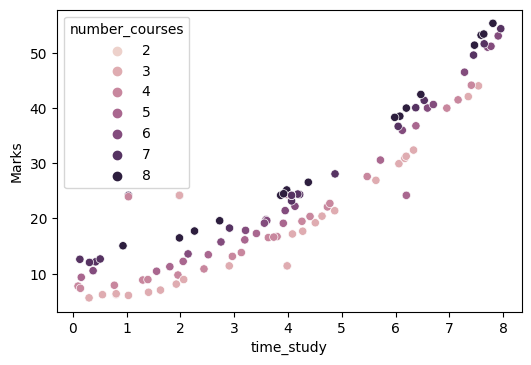

In [13]:
plt.figure(dpi=100)
sns.scatterplot(hue='number_courses',x='time_study',y="Marks",data = df)

<AxesSubplot:xlabel='time_study', ylabel='Marks'>

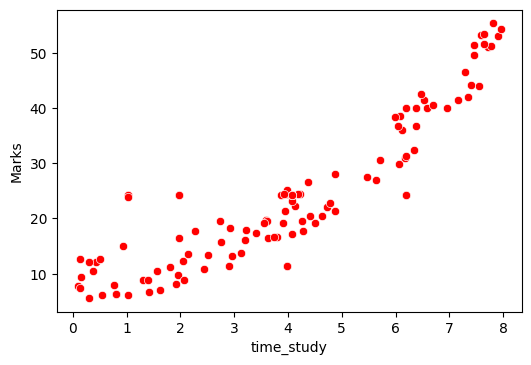

In [14]:
plt.figure(dpi=100)
sns.scatterplot(x='time_study',y="Marks",color="red",data = df)
# sns.lineplot(x='time_study',y="Marks",data=df)

<AxesSubplot:xlabel='number_courses', ylabel='Marks'>

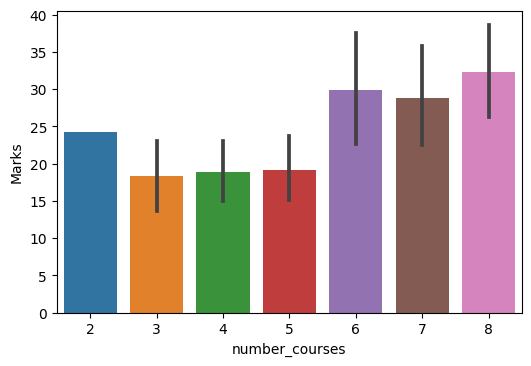

In [15]:
plt.figure(dpi=100)
sns.barplot(x='number_courses',y="Marks",data = df)

<AxesSubplot:xlabel='number_courses', ylabel='time_study'>

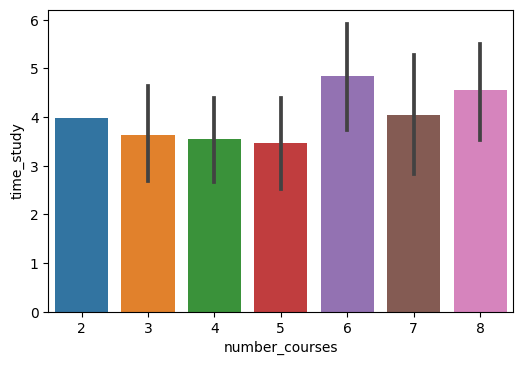

In [16]:
plt.figure(dpi=100)
sns.barplot(x='number_courses',y="time_study",data = df)

### SPLITING AND TRAINING

In [17]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [19]:
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)
print("Dependent variable training: ", Y_train.shape)
print("Dependent variable testing: ", Y_test.shape)

Training data shape:  (84, 2)
Testing data shape:  (29, 2)
Dependent variable training:  (84,)
Dependent variable testing:  (29,)


In [20]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [21]:
regression.intercept_

-5.99555298940831

In [22]:
regression.coef_

array([2.06244653, 4.89121044])

### PREDICTION

In [23]:
y_pred=regression.predict(X_test)
y_pred

array([ 5.244407  , 48.70926405, 16.76156332, 16.85609898, 21.74516828,
       19.84951977, 29.0238279 , 24.01683107, 11.93229434, 17.62027521,
       24.20923255, 15.06262741, 28.89661482,  9.95295677, 14.41542658,
       22.24136329,  9.07747171, 14.3485523 , 13.13553211, 23.45598614,
       28.33412562, 38.49810253, 23.80761481, 31.9177386 , 24.00709026,
       37.28997355, 29.67267301, 44.09524994,  2.93900261])

In [24]:
regression.score(X_train,Y_train)

0.8756643576777485

In [25]:
regression.score(X_test,Y_test)

0.8816822968997335

In [26]:
df2=pd.DataFrame()
df2["Actual_value"]=Y_test
df2["Predicted_value"]=regression.predict(X_test)
df2["Difference"]=df2["Actual_value"]-df2["Predicted_value"]
df2

,Actual_value,Predicted_value,Difference
89,6.053000,5.244407,0.808593
4,55.299000,48.709264,6.589736
40,13.119000,16.761563,-3.642563
69,13.562000,16.856099,-3.294099
10,11.397000,21.745168,-10.348168
45,15.725000,19.849520,-4.124520
70,27.569000,29.023828,-1.454828
66,19.590000,24.016831,-4.426831
47,10.429000,11.932294,-1.503294
11,24.318000,17.620275,6.697725
